### Статистический анализ.

#### Исследование данных о поездках пользователей сервиса GoFast.

###### Имеются данные о некоторых пользователях из нескольких городов, а также об их поездках. 
###### Цель: проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 
###### Условия пользования сервисом:
- без подписки:\
    абонентская плата отсутствует;\
    стоимость одной минуты поездки — 8 рублей;\
    стоимость старта (начала поездки) — 50 рублей;

- с подпиской Ultra\
    абонентская плата — 199 рублей в месяц;\
    стоимость одной минуты поездки — 6 рублей;\
    стоимость старта — бесплатно

In [1]:
#Импортирую данные и вывожу информацию о данных:
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import numpy as np
from scipy import stats as st


#### Шаг 1. Загрузка данных

In [2]:
#Импортирую данные и вывожу информацию о данных:

try:
    users = pd.read_csv('/datasets/users_go.csv')
except:
    users = pd.read_csv(r"C:\Users\Ahsas\Desktop\task4\users_go.csv")
try:
    riders = pd.read_csv('/datasets/rides_go.csv')
except:
    riders = pd.read_csv(r"C:\Users\Ahsas\Desktop\task4\rides_go.csv")    

try:
    subscr = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    subscr = pd.read_csv(r"C:\Users\Ahsas\Desktop\task4\subscriptions_go.csv")    


##### Описание данных:
users:
- user_id	уникальный идентификатор пользователя
- name	имя пользователя/
- age	возраст/
- city	город/
- subscription_type	тип подписки (free, ultra)

riders:
- user_id	уникальный идентификатор пользователя
- distance	расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал - кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date	дата совершения поездки

subscr:
- subscription_type	тип подписки
- minute_price	стоимость одной минуты поездки по данной подписке
- start_ride_price	стоимость начала поездки
- subscription_fee	стоимость ежемесячного платежа

In [3]:
print(users.info())
print()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None



,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
print(riders.info())
print()
riders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None



,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
print(subscr.info())
print()
subscr.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes
None



,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


#### Выводы:
- users_go - сохранен в переменную users - содержит 1565 записей. Пустых значений нет. Изменения типа данных не требуется.
- rides_go - сохранен в переменную riders -содержит 18068 записей. Пустых значений нет. Изменение типа требуется для колонки date методом to_datetime(). Поле - duration по заданию будет округлено меетодом np.ceil.
- users и rides имеют общий ключ - user_id
- subscriptions_go - сохранен в переменную subscr - содержит 2 записи с данными о тарифах для двух типов подписки. Пустых значений нет. Изменения типа данных не требуется. Имеет общий ключ с users_go - subscription_type, для восстановления информации о стоимости поездок в объединенном файле.


#### Шаг 2. Предобработка данных

In [6]:
# Проверю наличие пропущенных значений:
print(users.isna().sum())
print()
print(riders.isna().sum())
print()
print(subscr.isna().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

user_id     0
distance    0
duration    0
date        0
dtype: int64

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


In [7]:
# Проверю наличие явных дублей:
print('Число явных дублей в данных users:',users.duplicated().sum())
print('Число явных дублей в данных riders:', riders.duplicated().sum())
print('Число явных дублей в данных subscr:', subscr.duplicated().sum())
# Обнаружено 31 дублей в файле users. 

Число явных дублей в данных users: 31
Число явных дублей в данных riders: 0
Число явных дублей в данных subscr: 0


In [8]:
# Выведу индексы дублирующихся строк:
print(users.duplicated())     

0       False
1       False
2       False
3       False
4       False
        ...  
1560     True
1561     True
1562     True
1563     True
1564     True
Length: 1565, dtype: bool


In [9]:
# Удалю дубли в файле users и запишу в ту же переменную:
users=users.drop_duplicates().reset_index(drop=True)

#Проверка: 
print('Число явных дублей в данных users:',users.duplicated().sum())

Число явных дублей в данных users: 0


In [10]:
# Преобразую данные столбца date в дату:
riders['date']=pd.to_datetime(riders['date'], format='%Y-%m-%d')
# Проверка:
riders.dtypes

user_id              int64
distance           float64
duration           float64
date        datetime64[ns]
dtype: object

In [11]:
# Создам новый столбец с номером месяца на основе date:
riders['month']=riders['date'].dt.month
print(riders.head(3))
print()
print('Всего строк в файле:', len(riders))

   user_id     distance   duration       date  month
0        1  4409.919140  25.599769 2021-01-01      1
1        1  2617.592153  15.816871 2021-01-18      1
2        1   754.159807   6.232113 2021-04-20      4

Всего строк в файле: 18068


Предобработка, выводы:
  - данные "чистые";
  - удалены 31 дублирующие строки в файле users;
  - пустых значений не выявлено.

#### Шаг 3. Исследовательский анализ данных

##### 3. 1. Частота встречаемости городов:

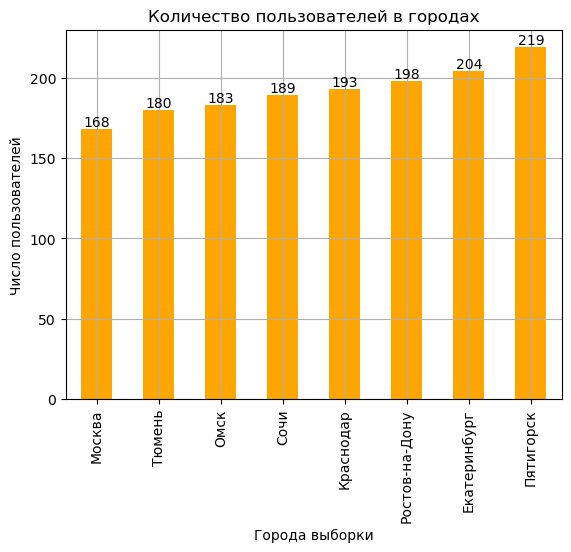

,count_city
count,8.000000
mean,191.750000
std,15.672998
min,168.000000
25%,182.250000
50%,191.000000
75%,199.500000
max,219.000000


In [12]:
user_by_city=users.pivot_table(index='city', values='user_id', aggfunc='count')
user_by_city.columns=['count_city']
ax= user_by_city.sort_values('count_city', ascending=True).plot(y='count_city', grid=True, kind='bar', color='orange',legend=None)

    
plt.title('Количество пользователей в городах')
plt.ylabel('Число пользователей')
plt.xlabel('Города выборки')

for i in ax.containers:
   ax.bar_label(i)
plt.show()

user_by_city.describe()


#### Вывод 3.1:
В выборке представлены 8 городов. Максимальное число пользователей - 219 - из Пятигорска. Далее с небольшим шагом следуют Екатеринбург и Ростов-на-Дону. Минимальное число пользователей из Москвы -168.


##### 3.2 Соотношение  пользователей с подпиской и без подписки;

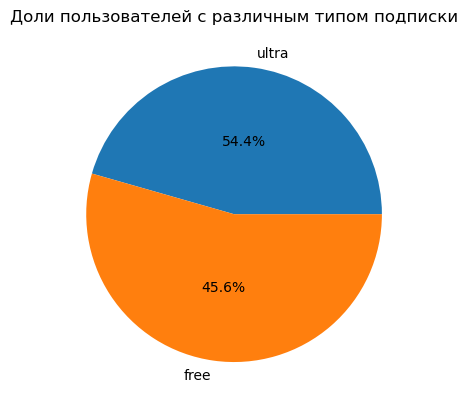

subscription_type
free     835
ultra    699
Name: No_subscr, dtype: int64


In [55]:
user_by_subsr=users.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
user_by_subsr.columns=['No_subscr']
user_by_subsr.sort_values('No_subscr', ascending=True).plot(y='No_subscr',autopct='%1.1f%%',pctdistance=-0.5,grid=True,legend=False, kind='pie')
plt.title('Доли пользователей с различным типом подписки')
plt.ylabel(None)
plt.show()
print(user_by_subsr['No_subscr'])


#### Вывод 3.2:
Большая доля пользователей в выборке не имеет подписки на сервис 54.4% (836).

##### 3.3 Возраст пользователей:

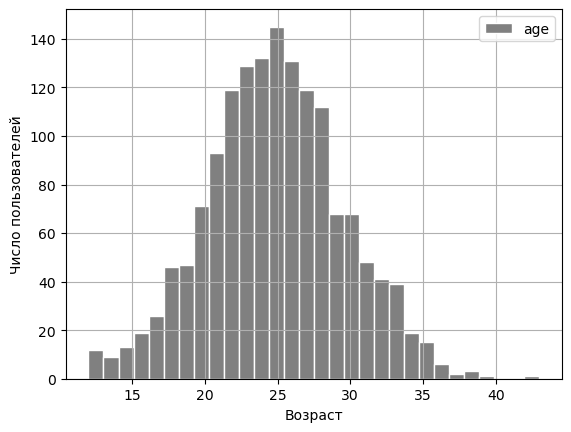

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [38]:
users.hist('age', bins=30, color='grey',ec='white', legend=True);
plt.ylabel('Число пользователей')
plt.xlabel('Возраст')
plt.title('')
plt.show()
users['age'].describe()

#### Вывод 3.3:
Доминирующий возраст пользователя - 25 лет.
Пользователи до 15 лет и после 35 - крайне редки. 
Подавляющее число пользователей - люди в возрасте от 22 до 28 лет.

##### 3.4 Расстояние, которое пользователь преодолел за одну поездку;

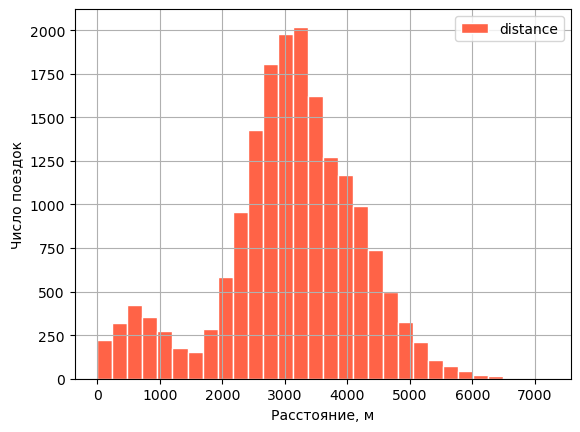

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64


In [37]:
riders.hist('distance', bins=30, color='tomato',ec='white', legend=True);
plt.ylabel('Число поездок')
plt.xlabel('Расстояние, м')
plt.title('')
plt.show()
print(riders['distance'].describe())


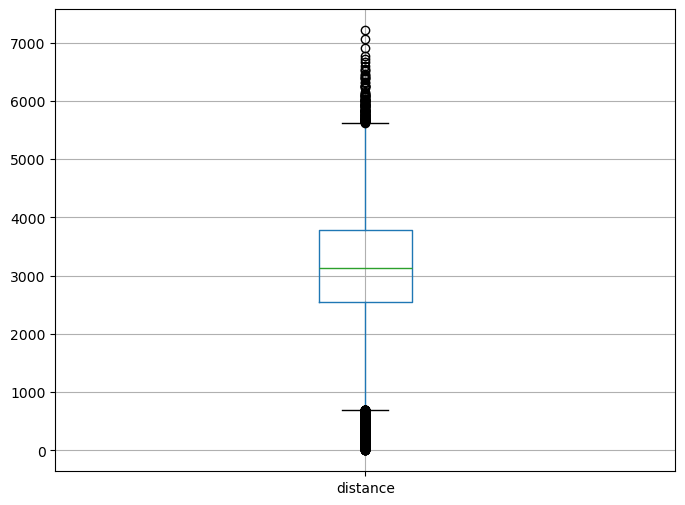

In [16]:
# Диаграмма размаха - дистанция поездки:
riders.boxplot(column='distance', figsize=(8, 6));

#### Вывод 3.4:
Преобладают поездки на дистанцию 2.8-3.8 км. 
На гистограмме также видимы короткие поездки по всплеску с дистанцией до, приблизительно, 1.5 кв.
Среднее и медианное значения - около 3.1 км.
Значения до, примерно 700 м и от 5.7 км выглядят выбросами на диаграмме размаха.

##### 3.5 Продолжительность поездок.

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

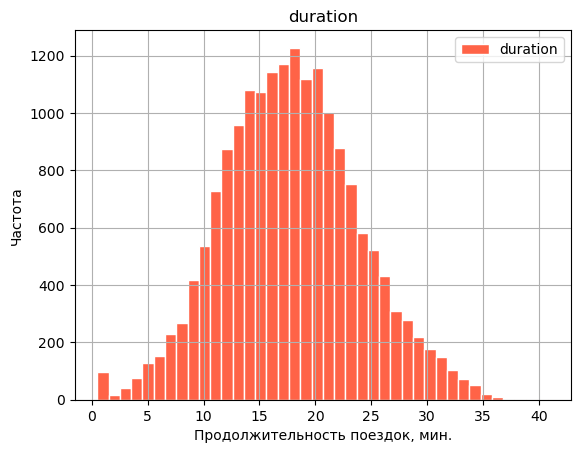

In [52]:
riders.hist('duration', bins=40, color='tomato',ec='white', legend=True);
plt.xlabel('Продолжительность поездок, мин.')
plt.ylabel('Частота')
riders['duration'].describe()

#### Вывод 3.5:
Продолжительность поездки колеблется в интервале от 0.5 до 41 мин. Виден незначительный всплеск супер-коротких поездок. Среднее и медианное значения - около 18 мин.

#### Шаг 4. Объединение данных

In [18]:
# Объединю все три файла и сохраню в переменную merged_r_u_s.
# Основой куда вливаю данные будет riders:
merged_riders=riders.merge(users, on='user_id', how='left')
merged_r_u_s=merged_riders.merge(subscr, on='subscription_type', how='left')
# округлю duration:
merged_r_u_s['duration']= np.ceil(merged_r_u_s['duration'])

merged_r_u_s.pivot_table(index='subscription_type', values='name', aggfunc='count')
merged_r_u_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int32         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


Вывод после объединения:
- Объединение файла в переменную merged_r_u_s прошло корректно. 
- Общее число записей осталось прежним - 18068 (rides_go содержит 18068 записей.) 
- Пропуски отсутствуют. Проведено округление duration. 
- Изменен тип данных для date из исходного riders.

In [19]:
# Проанализирую поездки по городам для пользователей с подпиской (и без)
# и их средниюю продолжительность:
pivot_rus=merged_r_u_s.pivot_table(index=('city','subscription_type'), values='duration', aggfunc=['count', 'mean'])

pivot_rus.columns=['rides_num', 'duration_mean']
pivot_rus['rides_num']=pivot_rus['rides_num']/1000
pivot_rus=pivot_rus.sort_values(['city','rides_num'])
pivot_rus

rides_num  duration_mean
city           subscription_type                          
Екатеринбург   ultra                  0.876      18.917808
               free                   1.585      17.991167
Краснодар      ultra                  0.780      18.857692
               free                   1.521      17.905983
Москва         ultra                  0.700      19.381429
               free                   1.175      18.010213
Омск           ultra                  0.827      18.984281
               free                   1.250      17.729600
Пятигорск      ultra                  0.852      19.061033
               free                   1.672      18.051435
Ростов-на-Дону ultra                  0.885      18.822599
               free                   1.565      17.694569
Сочи           ultra                  0.813      19.049200
               free                   1.446      17.744813
Тюмень         ultra                  0.767      19.311604
               free                   1.354      17.987445

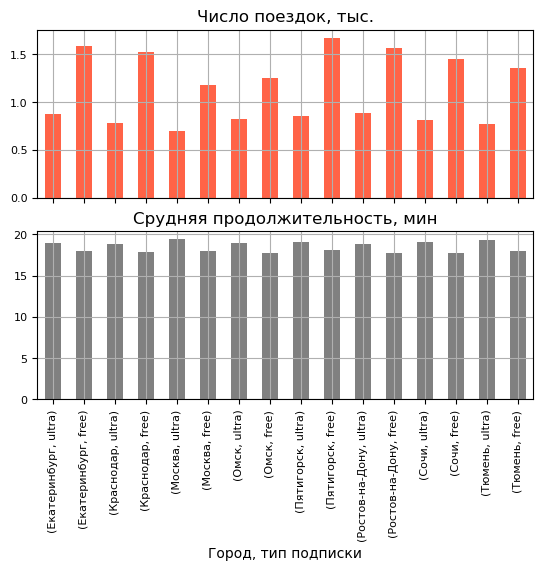

In [62]:
pivot_rus.plot(kind='bar', y=['rides_num','duration_mean'],subplots=True , xlabel='Город, тип подписки',\
               legend=False,title=['Число поездок, тыс.', 'Срудняя продолжительность, мин'],fontsize=8,grid=True, color=['tomato','grey'])
plt.xticks(size=8)
plt.yticks(size=8)
plt.show()


#### Вывод 4.
На диаграмме выше видно, что во всех городах число поездок, совершаемых пользователями без подписки превышает число подписанных ~ в 2 раза.
Средняя продолжительность поездки, напротив, меньше примерно на 1 мин у тех, кто пользуется без подписки.


Разделю полученный полный файл merged_r_u_s на 2 датафрейма:
 - пользователи с подпиской - rider_subscred
 - пользователи без подписки - rider_unsubscred
 
Проанализирую информацию о расстоянии и времени для каждой группы. 

In [21]:
rider_subscred=merged_r_u_s.loc[merged_r_u_s['subscription_type']=='ultra']
print('Число поездок пользователей с подпиской:', len(rider_subscred))

Число поездок пользователей с подпиской: 6500


count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

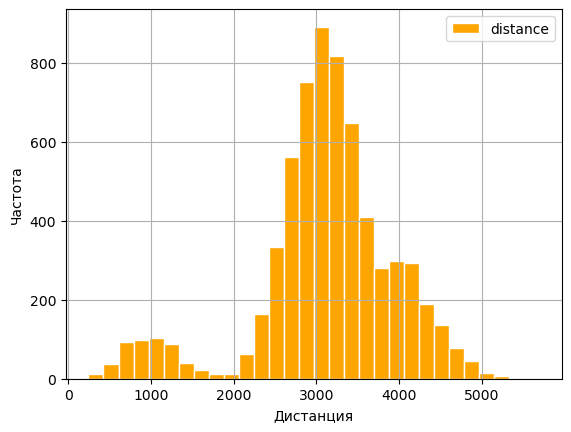

In [66]:
# Пользователи с подпиской:
rider_subscred.plot(y='distance',kind='hist', color='orange',ec='white', bins=30,grid=True)
plt.ylabel('Частота')
plt.xlabel('Дистанция')
rider_subscred['distance'].describe()

#### Вывод 4.1:
Наиболее частое значение дистанции находится на уровне 3 148 м. Подавляющее число поездок  совершаются на расстояние 2600 -3600 м. Виден также отдельный всплеск на уровне до 2000 м., со средним значение около 1000 м. Как упоминалось ранее, предположительно, это пользователи с регулярной потребностью в коротких поездках.\
Медианное значение дистанции - 3.1 км.\
Максимальное значение 5.7 км.

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

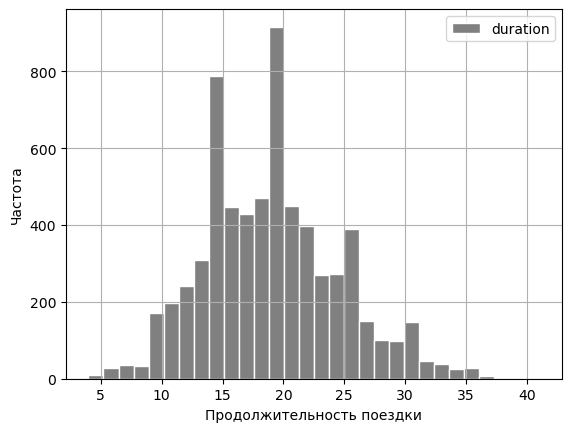

In [67]:
rider_subscred.plot(y='duration',kind='hist', color='grey',ec='white', bins=30, grid=True)
plt.ylabel('Частота')
plt.xlabel('Продолжительность поездки')
rider_subscred['duration'].describe()

#### Вывод 4.2:
Наиболее частые значения продолжительности поездки для пользователей с подпиской - 15 и 18 мин.\
-среднее значение продолжительности - 19 мин;\
-максимальное значение продолжительности - около 41 мин; \
-минимальное - до 4 мин.

In [24]:
# Пользователи без одписки:
rider_unsubscred=merged_r_u_s.loc[merged_r_u_s['subscription_type']=='free']
print('Число поездок пользователей с подпиской:', len(rider_unsubscred))


Число поездок пользователей с подпиской: 11568


count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

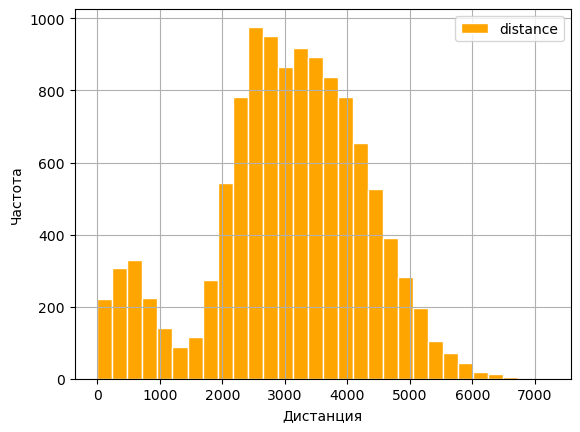

In [68]:
rider_unsubscred.plot(y='distance',kind='hist', color='orange',ec='white', bins=30,grid=True)
plt.ylabel('Частота')
plt.xlabel('Дистанция')
rider_unsubscred['distance'].describe()

#### Вывод 4.3:
Наиболее частое значение дистанции находится на уровне 2500 м (3 148 м для пользователей с подпиской). \
Подавляющее число поездок совершаются на расстояние 2200-4000 м (2600 -3600 м. для пользователей с подпиской). Виден также отдельный всплеск на уровне до 1500 м., со средним значение около 800 м. Как упоминалось ранее, предположительно, это пользователи с регулярной потребностью в коротких поездках.\
Медианное значение дистанции - 3.1 км.\
Максимальное значение 7.2 км.

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

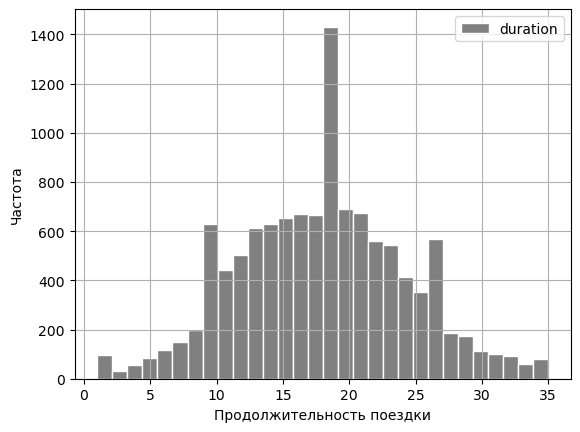

In [69]:
rider_unsubscred.plot(y='duration',kind='hist', color='grey',ec='white', bins=30, grid=True)
plt.ylabel('Частота')
plt.xlabel('Продолжительность поездки')
rider_unsubscred['duration'].describe()

### Вывод 4.4:
Наиболее частые значения продолжительности поездки тарифа Free находится в диапазоне 13-22 мин. Пик на значении 18 мин.\
-среднее значение продолжительности - 18 мин;\
-максимальное значение продолжительности - 35 мин; \
-минимальное - до 1 мин.

#### Шаг 5. Подсчёт выручки

In [27]:
# Общий файл после объединения данных 3х таблиц сохраню в другую переменную riders_pivot, где расчитаю выручку в мес.:
riders_pivot=merged_r_u_s
# Объединю содержание колонок month и user_id, для создания "ключа", чтобы после групппировки не оставалось признаков сводной таблицы:
riders_pivot['userid_month']=(riders_pivot['user_id'].astype ( str ) +['_'] + riders_pivot['month'].astype ( str ))
# Сруппирую данные, как указано в условии:
riders_pivot=riders_pivot.groupby('userid_month').agg({'distance':sum,'name':len ,'duration': sum, 'subscription_type':max, 'user_id': max, 'month': max})
# Переименую колонки:
riders_pivot.columns=[ 'total_monthly_distance','rides_number_monthly','total_monthly_duration', 'subscription_type', 'user_id', 'month']

riders_pivot.loc[riders_pivot['user_id']==1];

C:\Users\Ahsas\AppData\Local\Temp\ipykernel_17948\3778901658.py:6: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  riders_pivot=riders_pivot.groupby('userid_month').agg({'distance':sum,'name':len ,'duration': sum, 'subscription_type':max, 'user_id': max, 'month': max})
C:\Users\Ahsas\AppData\Local\Temp\ipykernel_17948\3778901658.py:6: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  riders_pivot=riders_pivot.groupby('userid_month').agg({'distance':sum,'name':len ,'duration': sum, 'subscription_type':max, 'user_id': max, 'month': max})
C:\Users\Ahsas\AppData\Local\Temp\ipykernel_17948\3778901658.py:6: FutureWarning: The prov

In [28]:
# Рассчитаю выручку для каждого клиента в месяце:
merged_r_u_s['income']=merged_r_u_s['start_ride_price']+merged_r_u_s['minute_price']*merged_r_u_s['duration']
# Объединю содержание колонок month и user_id, чтобы после групппировки не оставалось признаков сводной таблицы:
merged_r_u_s['userid_month']=(merged_r_u_s['user_id'].astype ( str ) +['_'] + merged_r_u_s['month'].astype ( str ))

merged_r_u_s_income=merged_r_u_s.groupby( 'userid_month').agg({'income': sum, 'subscription_type': max})
merged_r_u_s_income.columns=['monthly_income', 'subscription_type']
merged_r_u_s_income

C:\Users\Ahsas\AppData\Local\Temp\ipykernel_17948\612741899.py:6: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  merged_r_u_s_income=merged_r_u_s.groupby( 'userid_month').agg({'income': sum, 'subscription_type': max})
C:\Users\Ahsas\AppData\Local\Temp\ipykernel_17948\612741899.py:6: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  merged_r_u_s_income=merged_r_u_s.groupby( 'userid_month').agg({'income': sum, 'subscription_type': max})


,monthly_income,subscription_type
userid_month,,
1000_1,564.0,free
1000_10,356.0,free
1000_11,316.0,free
1000_2,524.0,free
1000_3,558.0,free
...,...,...
9_3,234.0,ultra
9_4,102.0,ultra
9_6,102.0,ultra


In [29]:
# Скорректирую месячную выручку для подписных клиентов,добавив к сумме стоимость ежемесячной подписки, для типа ultra:
def income(row):
    if row['subscription_type']=='ultra':
        return row['monthly_income']+199
    else:
        return row['monthly_income']+0
merged_r_u_s_income['monthly_income']=merged_r_u_s_income.apply(income, axis=1)

#merged_r_u_s_income.query('userid_month==[1000_2, 9_4]')
merged_r_u_s_income

,monthly_income,subscription_type
userid_month,,
1000_1,564.0,free
1000_10,356.0,free
1000_11,316.0,free
1000_2,524.0,free
1000_3,558.0,free
...,...,...
9_3,433.0,ultra
9_4,301.0,ultra
9_6,301.0,ultra


In [30]:
# Дополню общую таблицу riders_pivot данными об общей выручке из рассчета выше:
riders_pivot_final=riders_pivot.merge(merged_r_u_s_income['monthly_income'], on='userid_month', how='left')

# Рассчитаю средний помесячный чек для двух групп пользователей:
print(riders_pivot_final.groupby('subscription_type') ['monthly_income'].mean())

riders_pivot_final.head() # Итоговый файл после всех расчетов и преобразований

subscription_type
free     328.641365
ultra    362.792191
Name: monthly_income, dtype: float64


,total_monthly_distance,rides_number_monthly,total_monthly_duration,subscription_type,user_id,month,monthly_income
userid_month,,,,,,,
1000_1,8896.242665,2,58.0,free,1000,1,564.0
1000_10,4887.494194,2,32.0,free,1000,10,356.0
1000_11,5387.122991,2,27.0,free,1000,11,316.0
1000_2,8563.372738,2,53.0,free,1000,2,524.0
1000_3,8125.115681,3,51.0,free,1000,3,558.0


#### Вывод: 
Расчет среднего помесячного чека для групп ultra и free показывает, чтоб пользователи с подпиской ultra выгоднее для сервиса, прирост около 10%.

#### Шаг 6. Проверка гипотез

#### Задача 6.1: 
Тратят ли пользователи с подпиской больше времени на поездки?
( Проверить гипотезу, используя исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.)

H0 - пользователи ultra тртят столько же времени на поездки, сколько пользователи free.\
H1 - время пользователей ultra больше времени пользователей free.

In [31]:
#Использую метод для проверки гипотезы о равенстве среднего двух генеральных 
#совокупностей по взятым из них выборкам: 
#scipy.stats.ttest_ind(array1, array2, equal_var, alternative)
rider_unsubscred_ser=rider_unsubscred['duration']
rider_subscred_ser=rider_subscred['duration']

results = st.ttest_ind(rider_subscred_ser,rider_unsubscred_ser, alternative='greater')

alpha = 0.05
# уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: время пользователей ultra равно время пользователей free')
else:
    print('Не удалось отвергнуть нулевую гипотезу')


p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу: время пользователей ultra равно время пользователей free


#### Вывод 6.1:
Нулевая гипотеза о равенстве времени поездок пользователей с подпиской и без нее отвергнута. Есть основания полагать, что пользователи с подпиской ultra пользуются сервисом больше.

#### Задача 6.2:
Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

H0= среднее расстояние, которое проезжают пользователи с подпиской за одну поездку = 3130 метров.

H1= Односторонняя гипотеза вправо - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку > 3130 метров.

In [32]:
#проведу односторонний тест альтернативной гипотезы -scipy.stats.ttest_1samp(). 
#Теперь в качестве аргумента укажу alternative='greater'.

rider_subscred_ser=rider_subscred['distance']

threshold_value=3130

results = st.ttest_1samp(rider_subscred_ser, threshold_value, alternative='greater')

alpha = 0.05 
# уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Опровергаем нулевую гипотезу')
else:
    print('Не опровергаем нулевую гипотезу')


p-значение: 0.9195368847849785
Не опровергаем нулевую гипотезу


####  Вывод 6.2: 
- Не опровергаем нулевую гипотезу о равенстве среднего расстояния, которое проезжают пользователи с подпиской за одну поездку 3130 метров.
- Есть основания полагать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку равно или меньше 3130 метров.

####  Задача 6.3: 
Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

In [33]:
# Создам отдельные датафреймы из основного riders_pivot_final:
riders_pivot_final_ultra=riders_pivot_final.loc[riders_pivot_final['subscription_type']=='ultra']['monthly_income']
riders_pivot_final_free=riders_pivot_final.loc[riders_pivot_final['subscription_type']=='free']['monthly_income']
print('Пользователи Ultra')
print(riders_pivot_final_ultra.describe())
print()
print('Пользователи Free')
print(riders_pivot_final_free.describe())

Пользователи Ultra
count    4533.000000
mean      362.792191
std        88.262737
min       223.000000
25%       301.000000
50%       337.000000
75%       409.000000
max       955.000000
Name: monthly_income, dtype: float64

Пользователи Free
count    6798.000000
mean      328.641365
std       183.868330
min        58.000000
25%       194.000000
50%       274.000000
75%       428.000000
max      1444.000000
Name: monthly_income, dtype: float64


In [34]:
riders_pivot_final_ultra

userid_month
100_1    301.0
100_2    403.0
100_3    367.0
100_4    463.0
100_6    637.0
         ...  
9_3      433.0
9_4      301.0
9_6      301.0
9_8      265.0
9_9      283.0
Name: monthly_income, Length: 4533, dtype: float64

H0 = Нулевая гипотеза: средние значения трат пользователей из двух групп равны.

H1 = Альтернативная гипотеза: среднее значение трат пользователей с подпиской больше, чем среднее значение трат пользователей без подписки

In [ ]:
#Использую метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей: 
#scipy.stats.ttest_ind(array1, array2, equal_var, alternative)

alpha = 0.05 
# уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind( riders_pivot_final_ultra, riders_pivot_final_free, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


####  Вывод 6.3: 
Полученное p-value меньше заданного уровня. Есть основания говорить, что помесячная выручка от пользователей Ultra выше, чем выручка от пользователей без подписки.

####  Задача 6.4: 
Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

#### Ответ:
- в эксперименте на установление количества обращений для одной и той же совокупности пользователей используем метод st.ttest_rel(before, after), двусторонний тест для проверки изменения среднего.\
H0 - количество обращений в техподдержку не изменилось, равно.\
H1 - cреднее двух совокупностей увеличилось или уменьшилось. \
Для проверки в какую  сторону - посчитаю средние .mean().

#### Шаг 7. Распределения

### Основные выводы:

#### Проведено исследование данных о поездках пользователей сервиса GoFast на основе некоторых данных о пользователях из нескольких городов, а также об их поездках.

#### Шаг 1 – Изучение данных:
users_go - сохранен в переменную users - содержит 1565 записей. Пустых значений нет. Изменения типа данных не требуется.
rides_go - сохранен в переменную riders -содержит 18068 записей. Пустых значений нет. Изменение типа требуется для колонки date методом to_datetime(). Поле - duration по заданию будет округлено меетодом np.ceil.
users и rides имеют общий ключ - user_id
subscriptions_go - сохранен в переменную subscr - содержит 2 записи с данными о тарифах для двух типов подписки. Пустых значений нет. Изменения типа данных не требуется. Имеет общий ключ с users_go - subscription_type, для восстановления информации о стоимости поездок в объединенном файле.

#### Цель: проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.
Данные состоят из трех зависимых файлов, впоследствии объединенных и дополненных для целей анализа.

#### Шаг 2 – Предобработка:
- удалены 31 записи, являющиеся дублями;
- пустых значений не выявлено;
- других значимых дефектов в данных не обнаружено.
- округлены значения параметра duration методом np.ceil()
- добавлена техническая колонка – month  - месяц поездки.

#### Шаг 3. Исследовательский анализ данных:

3.1. Частота встречаемости городов:
В выборке представлены 8 городов. Максимальное число пользователей - 219 - из Пятигорска. Далее с небольшим шагом следуют Екатеринбург и Ростов-на-Дону. Минимальное число пользователей из Москвы -168.

3.2. Соотношение пользователей с подпиской и без подписки
Большая доля пользователей в выборке не имеет подписки на сервис 54.4% (836).

3.3. Возраст пользователей
Доминирующий возраст пользователя - 25 лет. Пользователи до 15 лет и после 35 - крайне редки. Подавляющее число пользователей - люди в возрасте от 22 до 28 лет.

3.4. Расстояние, которое пользователь преодолел за одну поездку;
Преобладают поездки на дистанцию 2.8-3.8 км. На гистограмме также видимы короткие поездки по всплеску с дистанцией до, приблизительно, 1.5 кв. Среднее и медианное значения - около 3.1 км. Значения до, примерно 700 м и от 5.7 км выглядят выбросами на диаграмме размаха.

3.5. Продолжительность поездок.
Продолжительность поездок колеблется в интервале от 0.5 до 41 мин. Виден незначительный всплеск суперкоротких поездок. Среднее и медианное значения - около 18 мин.

#### Шаг 4. Объединение данных

Данные трех файлов объединены методом merger и сохранены в переменную merged_r_u_s. Основой куда вливаю данные будет файл riders.
Количество записей в выборке по типу подписки:

- Subscription_type	No of rows	
- free	11568	
- ultra	6500	

Вывод после объединения: Объединение файла в переменную merged_r_u_s прошло корректно. Общее число записей осталось прежним - 18068 (rides_go содержит 18068 записей.) Пропуски отсутствуют. Проведено округление duration. Изменен тип данных для date из исходного riders.

Данные общего датафрейма merged_r_u_s разделены по типу подписки в разные переменные:
•	пользователи с подпиской - rider_subscred
•	пользователи без подписки - rider_unsubscred
Проанализирую информацию о расстоянии и времени для каждой группы.

##### Вывод 4. (дополнительно):
На диаграмме на основе Сводной таблицы по городам и типу подписки выше видно, что в анализируемой совокупности, во всех городах число поездок, совершаемых пользователями без подписки превышает число подписанных ~ в 2 раза. Средняя продолжительность поездки, напротив, меньше примерно на 1 мин у тех, кто пользуется без подписки.

#### Пользователи Free:

##### Вывод 4.1:
Наиболее частое значение дистанции находится на уровне 3 148 м. Подавляющее число поездок совершаются на расстояние 2600 -3600 м. Виден также отдельный всплеск на уровне до 2000 м., со средним значение около 1000 м. Как упоминалось ранее, предположительно, это пользователи с регулярной потребностью в коротких поездках.
Медианное значение дистанции - 3.1 км.
Максимальное значение 5.7 км.

##### Вывод 4.2:
Наиболее частые значения продолжительности поездки для пользователей с подпиской - 15 и 18 мин.
- среднее значение продолжительности - 19 мин;
- максимальное значение продолжительности - около 41 мин;
- минимальное - до 4 мин.

#### Пользователи Free:

##### Вывод 4.3:
Наиболее частое значение дистанции находится на уровне 2500 м (3 148 м для пользователей с подпиской).
Подавляющее число поездок совершаются на расстояние 2200-4000 м (2600 -3600 м. для пользователей с подпиской). Виден также отдельный всплеск на уровне до 1500 м., со средним значение около 800 м. Как упоминалось ранее, предположительно, это пользователи с регулярной потребностью в коротких поездках.
Медианное значение дистанции - 3.1 км.
Максимальное значение 7.2 км.

##### Вывод 4.4:
Наиболее частые значения продолжительности поездки тарифа Free находится в диапазоне 13-22 мин. Пик на значении 18 мин.\
-среднее значение продолжительности - 18 мин;\
-максимальное значение продолжительности - 35 мин; \
-минимальное - до 1 мин.

#### Шаг 5. Подсчёт выручки
Рассчитана помесячная выручка с учетом тарифного плана.
(userid_month – техническая колонка для группирования данных)
Расчет среднего помесячного чека для групп ultra и free показывает, чтоб пользователи с подпиской ultra выгоднее для сервиса, прирост около 10%.\
    subscription type average monthly income\
    free     328.641365\
    ultra    362.792191

#### Шаг 6. Проверка гипотез

##### Задача 6.1:
Тратят ли пользователи с подпиской больше времени на поездки? ( Проверить гипотезу, используя исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.) Нулевая гипотеза.

Получено:
p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу: время пользователей ultra = время пользователей free
Вывод 6.1:
Нулевая гипотеза о равенстве времени поездок пользователей с подпиской и без нее отвергнута. Есть основания полагать, что пользователи с подпиской ultra пользуются сервисом больше.

##### Задача 6.2:
Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Получено:
p-значение: 0.9195368847849785
Не опровергаем нулевую гипотезу
Вывод 6.2: 
- Не опровергаем нулевую гипотезу о равенстве среднего расстояния, которое проезжают пользователи с подпиской за одну поездку 3130 метрам.
- Есть основания полагать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку равно или меньше 3130 метров.

##### Задача 6.3:
Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Получено:
p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу
Вывод 6.3:
Полученное p-value меньше заданного уровня. Есть основания говорить, что помесячная выручка от пользователей Ultra выше, чем выручка от пользователей без подписки.

##### Задача 6.4:
Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Ответ:
- в эксперименте на установление количества обращений для одной и той же совокупности пользователей используем метод st.ttest_rel(before, after), двусторонний тест для проверки изменения среднего.\
H0 - количество обращений в техподдержку не изменилось, равно.\
H1 - cреднее двух совокупностей увеличилось или уменьшилось. \
Для проверки в какую  сторону - посчитаю средние .mean().
